In [1]:
# %%
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
# 1. Tải dữ liệu
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [10]:
# 2. Xây dựng mô hình CNN cải tiến
model = models.Sequential([
    # --- Lớp tích chập 1 ---
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # --- Lớp tích chập 2 ---
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # --- Lớp tích chập 3 (mới thêm) ---
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Dropout(0.25),  # giảm overfitting

    # --- Chuyển sang tầng fully-connected ---
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),   # giảm overfitting
    layers.Dense(10, activation='softmax')
])


d:\Tong\anaconda\envs\cv2\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# 3. Biên dịch và huấn luyện
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7869 - loss: 0.5819 - val_accuracy: 0.8627 - val_loss: 0.3744
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8665 - loss: 0.3700 - val_accuracy: 0.8841 - val_loss: 0.3163
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8856 - loss: 0.3173 - val_accuracy: 0.8945 - val_loss: 0.2907
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8969 - loss: 0.2843 - val_accuracy: 0.8939 - val_loss: 0.2840
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9058 - loss: 0.2592 - val_accuracy: 0.9068 - val_loss: 0.2615
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9098 - loss: 0.2450 - val_accuracy: 0.9045 - val_loss: 0.2659
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9159 - loss: 0.2287 - val_accuracy: 0.9107 - val_loss: 0.2563
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9211 - loss: 0.21

In [12]:
# 4. Đánh giá
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Độ chính xác trên tập kiểm tra: {test_acc*100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.9137 - loss: 0.2727
Độ chính xác trên tập kiểm tra: 91.37%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


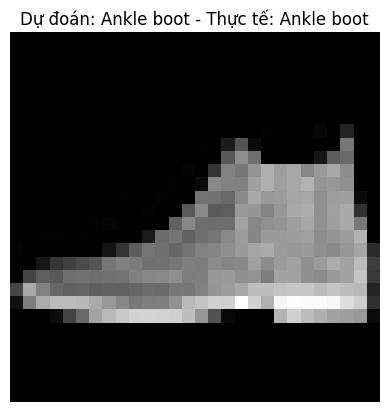

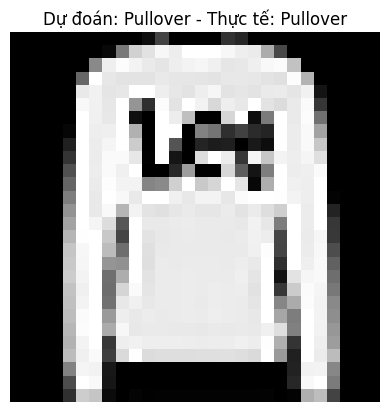

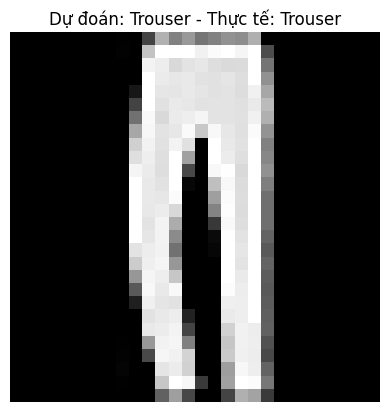

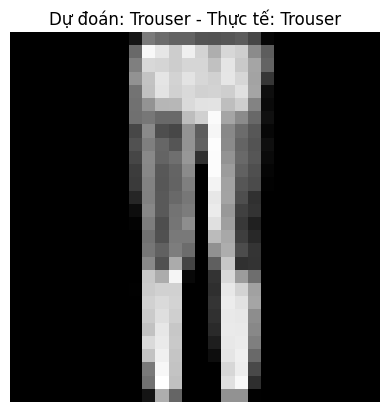

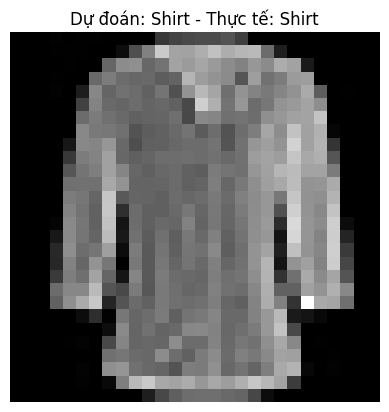

In [13]:
#-------------------------------Thử nghiệm với ảnh --------------------------------#
# %%
import numpy as np
import matplotlib.pyplot as plt

# Dự đoán xác suất các lớp
predictions = model.predict(x_test)
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
# Hàm tìm lớp có xác suất cao nhất
def predict_label(i):
    pred = np.argmax(predictions[i])
    true = y_test[i]
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Dự đoán: {class_names[pred]} - Thực tế: {class_names[true]}")
    plt.axis('off')
    plt.show()

# Thử 5 ảnh đầu tiên
for i in range(5):
    predict_label(i)

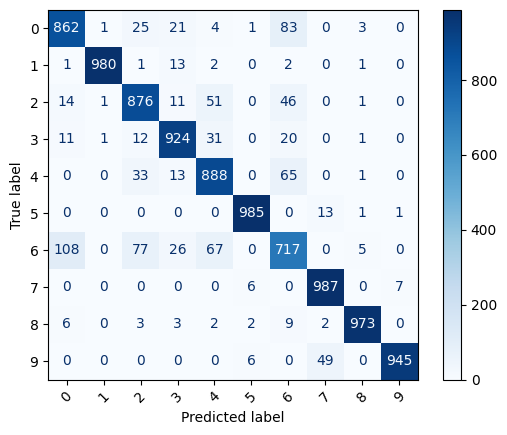

In [14]:
# Ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


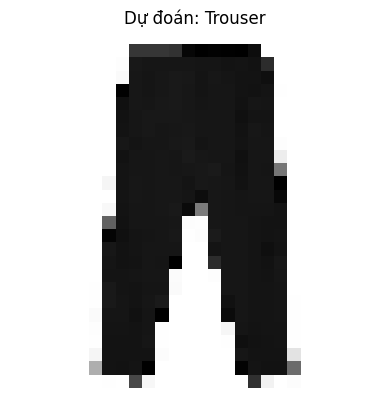

In [ ]:
# -----------------------Dự đoán với ảnh tùy chọn----------------------------#
# %%
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(r'D:\HUET\NAM 4\NAM 4 KI I\tgmt\ComputerVision2025\img\test9.jpg', target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img) / 255.0
img_array = 1 - img_array  # đảo màu nền trắng thành đen, giống Fashion-MNIST
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array) 
pred_label = np.argmax(prediction) # Danh sách class (Fashion-MNIST) 

class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ] # Hiển thị kết quả 
plt.imshow(img, cmap='gray') # <-- dùng 'img' gốc (PIL Image)

plt.title(f"Dự đoán: {class_names[pred_label]}")
plt.axis('off')
plt.show()



class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]